                                  ## WeRateDogs Data ##


# Introduction 

As we know Real-world data never comes clean that is why Data Wrangling is crirtical point in Data Analyst Process, At the process of Data Wrangling you will understand Data and the same time make it so usefull for further process as Machine learning or normal question .
Through this project we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.
The dataset is is the tweet archive of Twitter user.

we will answer 3 questions :
    
    What is the best breed dog in favorite count ?
    
    what is the gender of that breed ?
    
    is there any linearity between years and favorite count?
    
    Correlation between Favorite tweet and retweet count 
    


# Gathering Data
we three kind of data as described below:
  
    -The WeRateDogs Twitter archive. We will download the file 
        
    -The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_prediction_copys.tsv)
    
    -We will work JSON data and try to convert it as Dataframe from text file

In [260]:
# Import the libraries that we will need in this project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
#Read CSV file 

Twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [262]:
#Read file from url 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_prediction_copys = requests.get(url)

In [263]:
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(image_predictions.content)

In [264]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )


In [265]:
# Read and convert tweet_json.txt file into a dataframe
tweets = [json.loads(line) for line in open('tweet_json.txt','r')]

tweets = pd.DataFrame(tweets_copy)


# Assessing Data
After collecting each of the above data elements, 
our next step will be to evaluate them visually and programmatically for quality and cleanliness issues. 
We will find and document the issues.

In [266]:
# we will begin with Twitter archive data 
Twitter_archive.head()
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [267]:
# try to find Duplicated values from tweet_id columns cause is imprtent if we want to merge all datasets by tweet_id
Twitter_archive['tweet_id'].value_counts()


892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [268]:
Twitter_archive_copy = Twitter_archive.copy()

In [269]:
# let's check image_prediction_copy_copy Data 
image_prediction.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [270]:
# as we see image_prediction_copy has usefull info about the dogs breed  

In [271]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [272]:
image_prediction_copy_copy = image_prediction_copy.copy()

In [273]:
# let's check issues of tweets_copy Data 
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [274]:
tweets.info()
##  Making a copy of Dataset
tweets_copy  = tweets.copy()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o


# Archive dataset 
                               quality issues
    
In several columns null objects  (None to NaN)

Name column have invalid names i.e 'None', 'a', 'an'

The numerator and denominator columns have bad values

Create original rate from text
                               
We will remove this columns  (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id 

retweeted_status_timestamp)

Remove tweets_copy with retweet.


                                 Tidiness
    
We may want to add a gender column from the text columns in archives dataset

Various stages of dogs in columns instead of rows archives dataset


# image dataset
                               quality issues    
    
Missing values from images dataset 

Some tweet_ids have the same jpg_url

Some tweets_copy are have 2 different tweet_id one redirect to the other

                                  Tidiness
    
No need to all the informations in images dataset and jpg_url what matters 

Some columns could be one Column


# Json tweet file
                                  quality issues
    
This tweet_id (666020888022790149) duplicated 8 times



## Data Cleaning


# Define

Remove rows with 'retweeted_status_id' since we are interested in original tweets_copy only.


In [275]:
# droping rows which have values in retweet_status_x column

Twitter_archive_copy.drop(Twitter_archive_copy[Twitter_archive_copy.retweeted_status_id.notnull()].index, inplace = True)

## test

In [276]:
Twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

## Define 
Drop useless columns

## Code 


In [277]:
Twitter_archive_copy = Twitter_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                        'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

## test 


In [278]:
Twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


## Define 

Since we want to create one high quality and tidy master pandas DataFrame.
We will make image_prediction_copy data very usefull by convert p1 p2 ... columns etc to single column

## Code 


In [279]:

dogs_breed = []
Accuracy_level = []
def Dog_breed(Data):
    
    if (Data['p1_conf'] > Data['p2_conf']) & (Data['p1_conf'] > Data['p3_conf']):
        dogs_breed.append(Data['p1'])
    
    elif (Data['p2_conf'] > Data['p1_conf']) & (Data['p2_conf'] > Data['p3_conf']):
    
        dogs_breed.append(Data['p2'])
    
    elif (Data['p3_conf'] > Data['p1_conf']) & (Data['p3_conf'] > Data['p2_conf']):
    
        dogs_breed.append(image_prediction_copy['p3'])

image_prediction_copy.apply(Dog_breed, axis=1)

image_prediction_copy['dogs_breed'] = dogs_breed

    

## test 


In [280]:
image_prediction_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogs_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,paper_towel
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua


## Define

let's drop all useless columns 


## Code

In [281]:
image_prediction_copy = image_prediction_copy.drop(['jpg_url','img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)


## test


image_prediction_copy.head()

## Define
drop columns with a lot of null values as there is no way to solve them 


# Code

In [282]:
tweets_copy = tweets_copy.drop(['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','retweeted_status','geo','coordinates','place','contributors','in_reply_to_screen_name','quoted_status_id', 'quoted_status_id_str','quoted_status'],axis = 1)


# Test

In [283]:
tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2354 non-null   object
 1   id                             2354 non-null   int64 
 2   id_str                         2354 non-null   object
 3   full_text                      2354 non-null   object
 4   truncated                      2354 non-null   bool  
 5   display_text_range             2354 non-null   object
 6   entities                       2354 non-null   object
 7   extended_entities              2073 non-null   object
 8   source                         2354 non-null   object
 9   user                           2354 non-null   object
 10  is_quote_status                2354 non-null   bool  
 11  retweet_count                  2354 non-null   int64 
 12  favorite_count                 2354 non-null   int64 
 13  fav

## Define
lets fix created_at column for having the year column and month column for further study


## Code

In [284]:
tweets_copy['year'] = tweets_copy['created_at'].apply(lambda x: x.split(" ")[5])
tweets_copy['time'] = tweets_copy['created_at'].apply(lambda x: x.split(" ")[3])
tweets_copy['month'] = tweets_copy['created_at'].apply(lambda x: x.split(" ")[1])
tweets_copy['day'] = tweets_copy['created_at'].apply(lambda x: x.split(" ")[0])



tweets_copy = tweets_copy.drop('created_at', axis = 1)


## test

In [285]:
tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             2354 non-null   int64 
 1   id_str                         2354 non-null   object
 2   full_text                      2354 non-null   object
 3   truncated                      2354 non-null   bool  
 4   display_text_range             2354 non-null   object
 5   entities                       2354 non-null   object
 6   extended_entities              2073 non-null   object
 7   source                         2354 non-null   object
 8   user                           2354 non-null   object
 9   is_quote_status                2354 non-null   bool  
 10  retweet_count                  2354 non-null   int64 
 11  favorite_count                 2354 non-null   int64 
 12  favorited                      2354 non-null   bool  
 13  ret

## Define

rename the id column  to tweet_id for merging the data


## Code


In [286]:

tweets_copy.rename(columns = {'id':'tweet_id'}, inplace = True)


## test

In [287]:
tweets_copy

,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,year,time,month,day
0,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,39467,False,False,False,False,en,2017,16:23:56,Aug,Tue
1,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,33819,False,False,False,False,en,2017,00:17:27,Aug,Tue
2,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,25461,False,False,False,False,en,2017,00:18:03,Jul,Mon
3,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,42908,False,False,False,False,en,2017,15:58:51,Jul,Sun
4,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,41048,False,False,False,False,en,2017,16:00:24,Jul,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,111,False,False,False,False,en,2015,00:24:50,Nov,Mon
2350,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,311,False,False,False,False,en,2015,00:04:52,Nov,Mon
2351,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,128,False,False,False,False,en,2015,23:21:54,Nov,Sun
2352,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,132,False,False,False,False,en,2015,23:05:30,Nov,Sun


## Define 
 we gonna create dog_gender column from full_text column to answer the question of what is the best gender in dogs


## Code

In [288]:
male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in tweets_copy['full_text']:
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    else:
        dog_gender.append('NaN')

In [289]:
tweets_copy['dog_gender'] = dog_gender

## test

In [290]:
tweets_copy['dog_gender']

0          NaN
1       female
2         male
3       female
4         male
         ...  
2349       NaN
2350      male
2351       NaN
2352       NaN
2353       NaN
Name: dog_gender, Length: 2354, dtype: object

## Define 
Create the rate from text column for knowing rating of every dog and also fix the columns of rate nominator and denominator
and chose the denominator < 10 and nominator < 16

## Code

In [291]:

ratings = tweets_copy['full_text'].apply(lambda x: re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x))

r_num = []
r_denominator = []

for rate in ratings:
    
    if len(rate) == 0 :
        
        r_num.append('Nan')
        r_denominator.append('Nan')
    
    elif len(rate) == 1 :
        r_num.append(float(rate[0][0]))
        r_denominator.append(float(rate[0][-1]))
        
    elif len(rate) > 1 : 
        
        avg_rate = []
        
        for i in range(len(rate)):
            avg_rate.append(float(rate[i][0]))
        avg_rate = sum(avg_rate)
        avg_rate = avg_rate/len(rate)
        r_num.append(avg_rate)
        r_denominator.append(10)
    else: 
        r_num.append('Error')
        r_denominator.append('Error')


In [292]:
# Craeting new columns for the values of rate_denominator and rate numunator
tweets_copy['rating_numenator'] = r_num 
tweets_copy['rating_denominator'] = r_denominator

In [293]:
## We will change the type of rating_denominator and rating_numenator a float 
## for better using in Visualisation data
tweets_copy['rating_numenator'] = tweets_copy['rating_numenator'].astype(float)
tweets_copy['rating_denominator'] = tweets_copy['rating_denominator'].astype(float)

In [294]:
# we will remove outliers data as denominator > 10 and numenator > 16
tweets_copy = tweets_copy[tweets_copy['rating_denominator'] <= 10]
tweets_copy = tweets_copy[tweets_copy['rating_numenator'] <= 16]


## test 

In [295]:
tweets_copy.head()

,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,...,possibly_sensitive,possibly_sensitive_appealable,lang,year,time,month,day,dog_gender,rating_numenator,rating_denominator
0,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,False,en,2017,16:23:56,Aug,Tue,NaN,13.0,10.0
1,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,False,en,2017,00:17:27,Aug,Tue,female,13.0,10.0
2,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,False,en,2017,00:18:03,Jul,Mon,male,12.0,10.0
3,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,False,en,2017,15:58:51,Jul,Sun,female,13.0,10.0
4,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,False,en,2017,16:00:24,Jul,Sat,male,12.0,10.0


## Define 
finding the names of Dogs from full_text column and counting the names of Dog


## Code

In [296]:
dog_names = []

for t in tweets_copy['full_text']:
    if t.startswith('This is ') and re.match(r'[A-Z].*', t.split()[2]):
        dog_names.append(t.split()[2].strip(',').strip('.'))
    elif t.startswith('Meet ') and re.match(r'[A-Z].*', t.split()[1]):
        dog_names.append(t.split()[1].strip(',').strip('.'))
    elif t.startswith('Say hello to ') and re.match(r'[A-Z].*', t.split()[3]):
        dog_names.append(t.split()[3].strip(',').strip('.'))
    elif t.startswith('Here we have ') and re.match(r'[A-Z].*', t.split()[3]):
        dog_names.append(t.split()[3].strip(',').strip('.'))
    elif 'named' in t and re.match(r'[A-Z].*', t.split()[t.split().index('named') + 1]):
        dog_names.append(t.split()[t.split().index('named') + 1].strip(',').strip('.'))
    else:
        dog_names.append('NaN')


In [297]:
tweets_copy['dog_name'] = dog_names

In [298]:
tweets_copy['dog_name'].value_counts()

NaN           923
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Blanket         1
Geno            1
Stark           1
Beya            1
Christoper      1
Name: dog_name, Length: 951, dtype: int64

## Test

In [299]:
tweets_copy.head()

,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,...,possibly_sensitive_appealable,lang,year,time,month,day,dog_gender,rating_numenator,rating_denominator,dog_name
0,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,en,2017,16:23:56,Aug,Tue,NaN,13.0,10.0,Phineas
1,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,en,2017,00:17:27,Aug,Tue,female,13.0,10.0,Tilly
2,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,en,2017,00:18:03,Jul,Mon,male,12.0,10.0,Archie
3,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,en,2017,15:58:51,Jul,Sun,female,13.0,10.0,Darla
4,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,...,False,en,2017,16:00:24,Jul,Sat,male,12.0,10.0,Franklin


## Define 
Remove some other useless columns


## Code

In [300]:
tweets_copy = tweets_copy.drop(['lang','extended_entities','display_text_range','user','favorited','retweeted','entities'], axis =1)         

tweets_copy = tweets_copy.drop(['source'], axis = 1)

## test 

In [301]:
tweets_copy.head()

,tweet_id,id_str,full_text,truncated,is_quote_status,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,year,time,month,day,dog_gender,rating_numenator,rating_denominator,dog_name
0,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,False,8853,39467,False,False,2017,16:23:56,Aug,Tue,NaN,13.0,10.0,Phineas
1,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,False,6514,33819,False,False,2017,00:17:27,Aug,Tue,female,13.0,10.0,Tilly
2,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,False,4328,25461,False,False,2017,00:18:03,Jul,Mon,male,12.0,10.0,Archie
3,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,False,8964,42908,False,False,2017,15:58:51,Jul,Sun,female,13.0,10.0,Darla
4,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,False,9774,41048,False,False,2017,16:00:24,Jul,Sat,male,12.0,10.0,Franklin


In [302]:
## We will Merge All 3 Dataset

wrangle_act = pd.merge(tweets_copy, image_prediction_copy, on='tweet_id')


wrangle_act = pd.merge(wrangle_act, Twitter_archive_copy, on = 'tweet_id')


In [303]:
## lets drop some other useless columns :
wrangle_act = wrangle_act.drop(['id_str','source','timestamp','expanded_urls','doggo','floofer','pupper','puppo','truncated','id_str','is_quote_status','possibly_sensitive','possibly_sensitive_appealable'], axis =1)         


In [304]:
wrangle_act.head()
wrangle_act.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 1977
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1978 non-null   int64  
 1   full_text             1978 non-null   object 
 2   retweet_count         1978 non-null   int64  
 3   favorite_count        1978 non-null   int64  
 4   year                  1978 non-null   object 
 5   time                  1978 non-null   object 
 6   month                 1978 non-null   object 
 7   day                   1978 non-null   object 
 8   dog_gender            1978 non-null   object 
 9   rating_numenator      1978 non-null   float64
 10  rating_denominator_x  1978 non-null   float64
 11  dog_name              1978 non-null   object 
 12  dogs_breed            1978 non-null   object 
 13  text                  1978 non-null   object 
 14  rating_numerator      1978 non-null   int64  
 15  rating_denominator_y 

In [305]:
wrangle_act = wrangle_act.drop(['rating_numerator','rating_denominator_y'], axis =1)

In [306]:
Twitter_archive_copy_master = wrangle_act


## Storing Data 

In [307]:
#Storing the clean dataset in Twitter_archive_copy_master file 
Twitter_archive_copy_master.to_csv('Twitter_archive_copy_master.csv', index=False, encoding = 'utf-8')


## Analyzing and Visualizing Data
 


Text(0, 0.5, 'dog_breed')

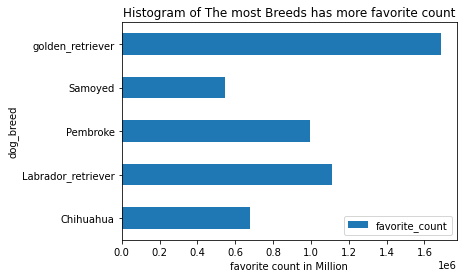

In [308]:
data_by_breed = Twitter_archive_copy_master[Twitter_archive_copy_master['dogs_breed'] != 'None']  
data_by_breed = data_by_breed.groupby('dogs_breed').sum('favorite_count')
data_by_breed = data_by_breed.reset_index()
data_by_breed = data_by_breed[data_by_breed['favorite_count'] > 500000 ]

data_by_breed.plot('dogs_breed','favorite_count',kind = 'barh')
plt.title('Histogram of The most Breeds has more favorite count')
plt.xlabel('favorite count in Million')
plt.ylabel('dog_breed')


  As we see here Golden_retriever is the best race in favorite count 
  

Text(0.5, 1.0, 'Histogram of The most gender has more favorite count')

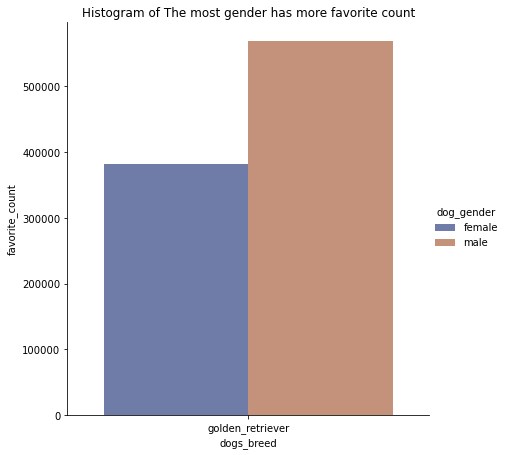

In [309]:
df_by_breed = Twitter_archive_copy_master[Twitter_archive_copy_master['dogs_breed'] == 'golden_retriever']
df_by_breed_gender =  df_by_breed[df_by_breed['dog_gender'] != 'NaN']

df_by_breed_gender = df_by_breed_gender.groupby(['dogs_breed', 'dog_gender']).sum('favorite_count')
df_by_breed_gender = df_by_breed_gender.reset_index()

sns.catplot(
    data=df_by_breed_gender, kind="bar",
    x="dogs_breed", y="favorite_count", hue="dog_gender", ci="sd", palette="dark", alpha=.6, height=6)
plt.title('Histogram of The most gender has more favorite count')



Male Golden Retriever has Most favorite count 

Text(0.5, 1.0, 'Histogram of years over favorite counts')

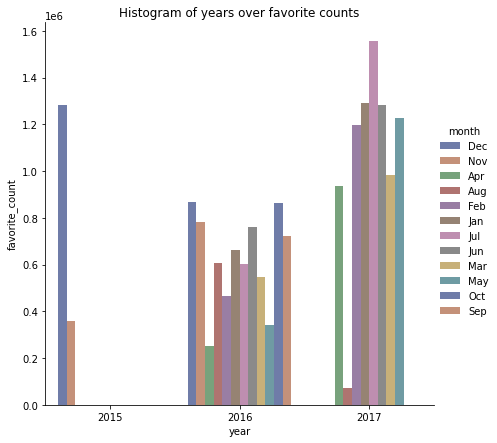

In [310]:
df_by_date = Twitter_archive_copy_master.groupby(['year','month']).sum('favorite_count')
df_by_date = df_by_date.reset_index()
df_by_date['month'] = df_by_date['month'].astype(str)



sns.catplot(
    data=df_by_date, kind="bar",
    x="year", y="favorite_count", hue="month", ci="sd", palette="dark", alpha=.6, height=6)
plt.title('Histogram of years over favorite counts')



 As we see there is some months missing in every year ,that give us a no suitable view for 
  distrubition of favorite count in every year.
we can conclude that after every year the sum of favorite count is increase is due to more twitter user after every year .



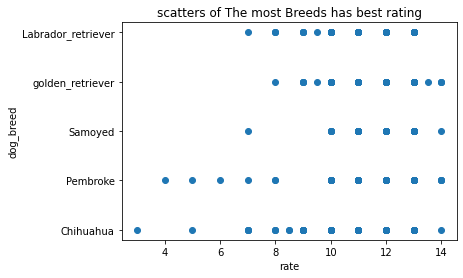

In [311]:
data_by_rate = Twitter_archive_copy_master[Twitter_archive_copy_master['dogs_breed'] != 'None']  
data_by_rate = data_by_rate[(data_by_rate['dogs_breed'] == 'Chihuahua')| (data_by_rate['dogs_breed'] =='golden_retriever') | (data_by_rate['dogs_breed'] =='Samoyed')|
                           (data_by_rate['dogs_breed'] == 'Pembroke')| (data_by_rate['dogs_breed'] =='Labrador_retriever')]  

plt.scatter(data_by_rate['rating_numenator'], data_by_rate['dogs_breed'])
plt.title('scatters of The most Breeds has best rating')
plt.xlabel('rate')
plt.ylabel('dog_breed')
plt.show()

golden_retriever still has the best rating , all rating of golden_ratriever is more than 8 and the best rate is 14 
not as other breed as chihuahua has 14 as max rate but 1 as minimale rate

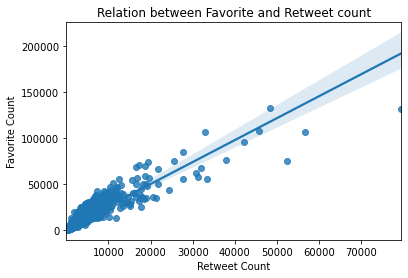

In [312]:
sns.regplot(x = 'retweet_count', y = 'favorite_count', data = Twitter_archive_copy_master)
plt.title('Relation between Favorite and Retweet count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

The more the post id retweeted the more eyes on it and the more favorites.



# Insights 

Lucy, cooper, Charlie and Oliver are the most common names. Over 923 dogs name are unknown.

Top dogs with higher favorite count and retweet count has a higher rating of 14.

There is a positive correlation between number of retweets_copy and favorite count. 
The more the post id retweeted the more eyes on it and the more favorites.




Golden retrievers are smart, loyal dogs that are ideal family companions. With their gentle nature, shining coats, and charming smiles, they are considered one of the most popular breeds in America.
that is why has the best favorite count and best rating in this datasets